In [2]:
from src.data.data_setup import loaders

train_loader, valid_loader = loaders(download=False)

In [4]:
train_loader['cifar10']

In [2]:
mnist_train_loader = train_loader['mnist']

In [3]:
for batch in mnist_train_loader:
    x, y = batch
    break

In [4]:
print(x.shape, y.shape)

torch.Size([128, 3, 32, 32]) torch.Size([128])


In [ ]:
import yaml

with open("config.yaml", "r", encoding="utf-8") as f:
    a = yaml.safe_load(f)

print(a)

yaml.safe_dump()

{'project': 'RDKD', 'exp_name': '01_baseline_test', 'seed': 3407, 'device': 'cuda', 'precision': 'fp32', 'output': {'dir': 'runs/${exp_name}/${data.dataset}', 'namefmt': '%Y%m%d_%H%M%S'}, 'data': {'root': 'dataset', 'dataset': 'cifar10', 'batch_size': 128, 'num_workers': 4, 'pin_memory': True, 'download': True, 'aug': {'enable': True, 'cifar': {'random_crop_pad': 4, 'horizontal_flip_p': 0.5, 'cutout': 0}, 'mnist_like': {'random_crop_pad': 0, 'horizontal_flip_p': 0.0}}}, 'model': {'backbone': 'resnet18', 'num_classes': 10, 'ckpts': {'teacher': 'src/model/ckpts/resnet34.pt', 'student': None}, 'load_pretrained': True, 'strict_load': False}, 'train': {'test_every': 1, 'epochs': 100, 'linear_probe': {'enable': True, 'epochs': 20, 'freeze_bn': True}, 'finetune': {'enable': True, 'epochs': 80}, 'optimizer': {'name': 'AdamW', 'lr': 0.0003, 'weight_decay': 0.05, 'betas': [0.9, 0.999], 'eps': 1e-08}, 'scheduler': {'name': 'cosine', 'warmup_epochs': 5, 'min_lr': 1e-06}}, 'logging': {'wandb': Fals

{'epoch': 1, 'time_sec': 57.123282399999994, 'train_loss': 5.812416379089355, 'train_loss_ce': 4.754245143737793, 'train_loss_kd': 6.265918334655762, 'train_acc': 0.06564, 'val_loss': 4.706577142333984, 'val_loss_ce': 4.10061155090332, 'val_loss_kd': 4.966276687240601, 'val_acc': 0.1462, 'lr': 0.00011999999999999999}


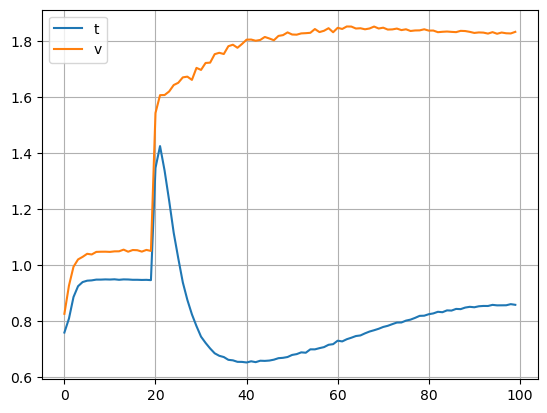

In [ ]:
import json

data = []
with open(r'runs/02_soft_kd/tiny_imagenet/metrics_per_epoch.jsonl', 'r') as f:
    for line in f:
        # 줄바꿈 문자 제거 후 json 파싱
        record = json.loads(line.strip())
        data.append(record)

print(data[0])

t_ratio = []
v_ratio = []
for line in data:
    tce = line['train_loss_ce']
    tkd = line['train_loss_kd']
    vce = line['val_loss_ce']
    vkd = line['val_loss_kd']
    t_ratio.append(tce/tkd)
    v_ratio.append(vce/vkd)

import matplotlib.pyplot as plt
plt.plot(t_ratio, label='t')
plt.plot(v_ratio, label='v')
plt.legend()
plt.grid()
plt.show()

In [6]:
a = data[0]

In [11]:
a

'{"epoch": 1, "time_sec": 57.123282399999994, "train_loss": 5.812416379089355, "train_loss_ce": 4.754245143737793, "train_loss_kd": 6.265918334655762, "train_acc": 0.06564, "val_loss": 4.706577142333984, "val_loss_ce": 4.10061155090332, "val_loss_kd": 4.966276687240601, "val_acc": 0.1462, "lr": 0.00011999999999999999}\n'

In [24]:
datasets = ['cifar10', 'cifar100', 'stl10', 'tiny_imagenet']

root_path = r'runs/_quick_2/'
steps_list = []
metrics_list = []

for dataset in datasets:
    s_path = root_path + dataset + r'/bi_per_step.jsonl'
    m_path = root_path + dataset + r'/metrics_per_epoch.jsonl'

    steps = []
    metrics = []
    with open(s_path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            steps.append(record['b_i'])
    steps_list.append(steps)
    
    with open(m_path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            metrics.append(record)
    metrics_list.append(metrics)

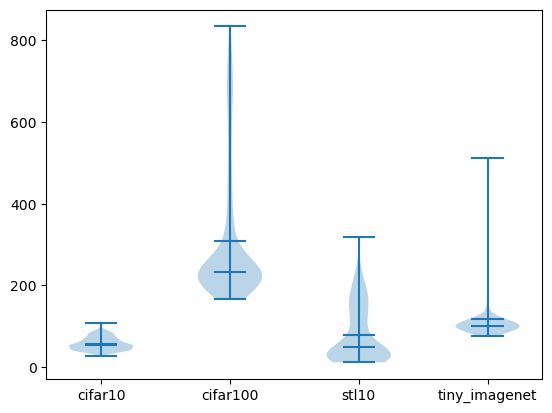

In [20]:
plt.violinplot(steps_list, showmeans=True, showmedians=True)
plt.xticks([1,2,3,4],datasets)
plt.show()



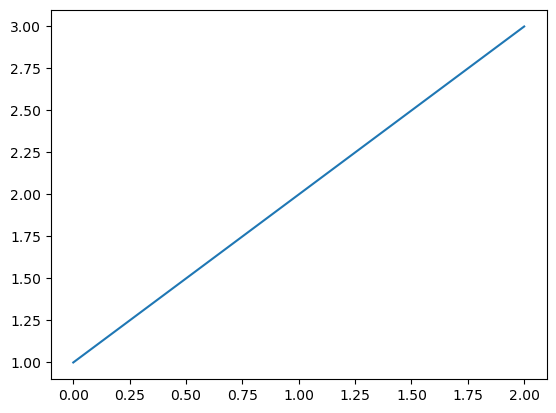

In [17]:
import matplotlib.pyplot as plt

plt.plot([1,2,3])

In [25]:
metrics_list

[[{'epoch': 1,
   'time_sec': 33.274134397506714,
   'train_loss_ce': 1.285982282875139,
   'train_loss_kd': 7.106988977593229,
   'train_loss_base': 5.360686924756336,
   'train_loss_rkd': 0.020899304367430375,
   'b_mean': 75.17765644200318,
   'b_median': 74.54275512695312,
   'b_trimmed_mean': 74.98638568046073,
   'num_steps': 391},
  {'epoch': 2,
   'time_sec': 15.412721157073975,
   'train_loss_ce': 0.8849183500117963,
   'train_loss_kd': 3.7045731239611537,
   'train_loss_base': 2.8586766628353186,
   'train_loss_rkd': 0.01575660617197947,
   'b_mean': 54.39526309625572,
   'b_median': 54.294883728027344,
   'b_trimmed_mean': 54.35331678525584,
   'num_steps': 391},
  {'epoch': 3,
   'time_sec': 15.539408206939697,
   'train_loss_ce': 0.6301069159794341,
   'train_loss_kd': 2.585493865220443,
   'train_loss_base': 1.9988777579553902,
   'train_loss_rkd': 0.014272064451709428,
   'b_mean': 41.94401803955702,
   'b_median': 41.61976623535156,
   'b_trimmed_mean': 41.8607641873886

C:\Users\gauoo\AppData\Local\Temp\ipykernel_67332\3062391385.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


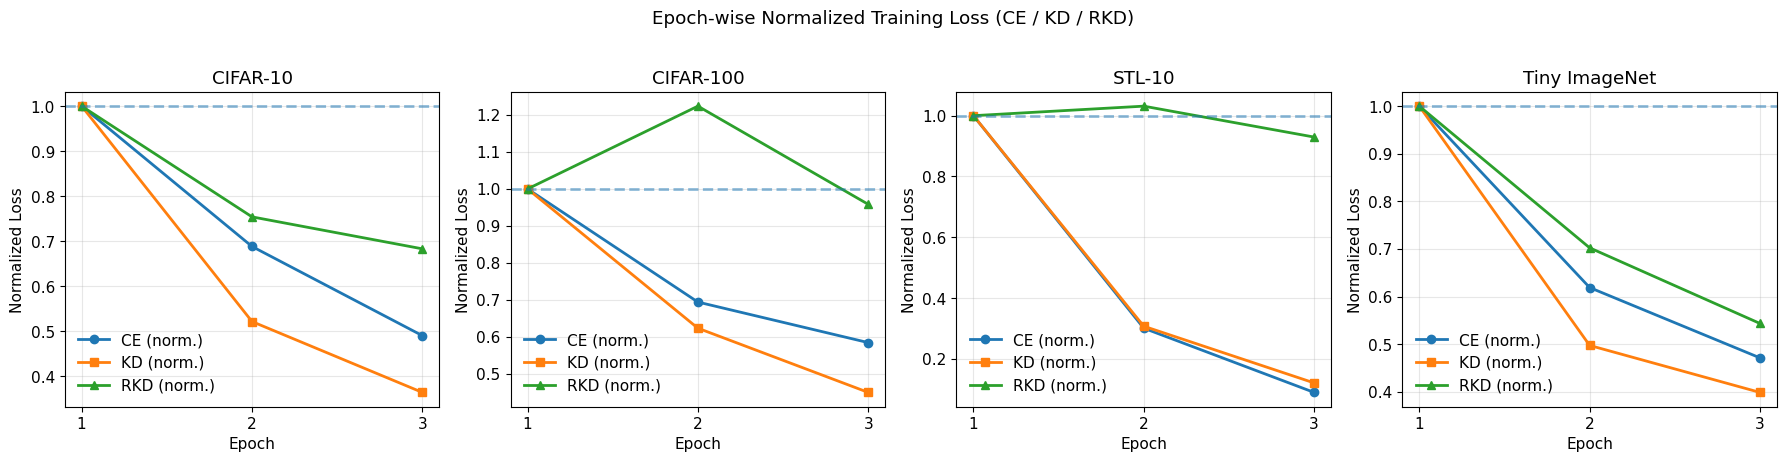

In [32]:
import matplotlib.pyplot as plt

def plot_normalized_losses(metrics_list):
    """
    metrics_list: 길이 4의 리스트
      - 각 원소는 에폭별 딕셔너리 리스트
      - 각 딕셔너리는 'epoch', 'train_loss_ce', 'train_loss_kd', 'train_loss_rkd' 키를 가짐
    """
    assert len(metrics_list) == 4, "metrics_list는 길이 4여야 합니다. (cifar10, cifar100, stl10, tiny imagenet)"
    dataset_names = ["CIFAR-10", "CIFAR-100", "STL-10", "Tiny ImageNet"]

    # 보기 좋은 스타일 몇 가지 설정
    plt.rcParams.update({
        "font.size": 11,
        "axes.grid": True,
        "grid.alpha": 0.3,
        "lines.linewidth": 2.0,
        "legend.frameon": False
    })

    fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=False, constrained_layout=True)

    for ax, metrics, name in zip(axes, metrics_list, dataset_names):
        # 에폭과 원시 값
        epochs = [m["epoch"] for m in metrics]

        ce_vals = [m["train_loss_ce"] for m in metrics]
        kd_vals = [m["train_loss_kd"] for m in metrics]
        rkd_vals = [m["train_loss_rkd"] for m in metrics]

        # epoch=1 기준 정규화(0으로 나눔 방지)
        def _norm(arr):
            base = arr[0]
            if base == 0:
                # 기준값이 0이면 정규화 불가하므로 그대로 반환
                return arr
            return [v / base for v in arr]

        ce_n = _norm(ce_vals)
        kd_n = _norm(kd_vals)
        rkd_n = _norm(rkd_vals)

        # 플롯
        ax.plot(epochs, ce_n, marker="o", label="CE (norm.)")
        ax.plot(epochs, kd_n, marker="s", label="KD (norm.)")
        ax.plot(epochs, rkd_n, marker="^", label="RKD (norm.)")

        # 기준선(y=1) 표시
        ax.axhline(1.0, linestyle="--", alpha=0.5)

        # 축/제목/범례
        ax.set_title(name)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Normalized Loss")
        ax.set_xticks(epochs)
        ax.legend(loc="best")

    fig.suptitle("Epoch-wise Normalized Training Loss (CE / KD / RKD)", y=1.02)
    plt.tight_layout()
    plt.show()


plot_normalized_losses(metrics_list)


C:\Users\gauoo\AppData\Local\Temp\ipykernel_67332\1071720607.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


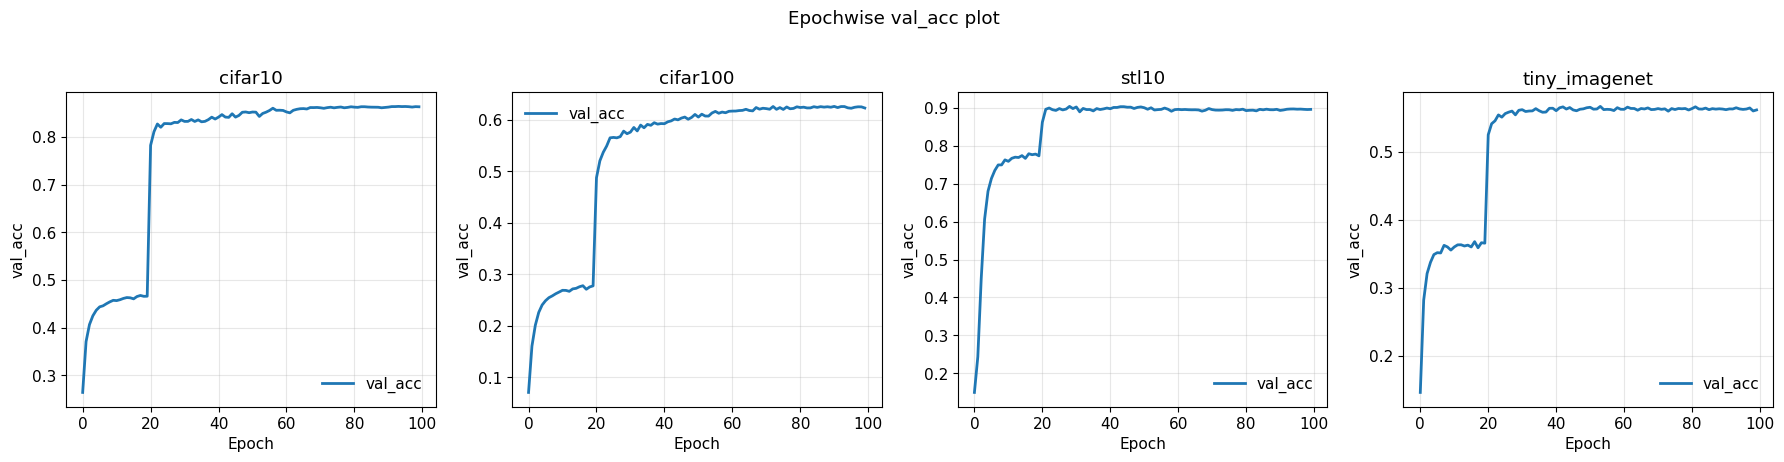

In [42]:
datasets = ['cifar10', 'cifar100', 'stl10', 'tiny_imagenet']
tag = 'val_acc'
# [{"epoch", "time_sec", "train_loss", "train_loss_ce", "train_loss_kd", "train_acc", 
# "val_loss", "val_loss_ce", "val_loss_kd", "val_acc", "lr"]

root_path = r'runs/02_soft_kd/'
lst = []

for dataset in datasets:
    path = root_path + dataset + r'/metrics_per_epoch.jsonl'
    element = []
    with open(path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            element.append(record[tag])
    lst.append(element)

# 보기 좋은 스타일 몇 가지 설정
plt.rcParams.update({
    "font.size": 11,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 2.0,
    "legend.frameon": False
})

fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=False, constrained_layout=True)
epochs = list(range(len(lst[0])))
for ax, element, name in zip(axes, lst, datasets):
    ax.plot(epochs, element, label=tag)
    # 축/제목/범례
    ax.set_title(name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(tag)
    ax.legend(loc="best")

fig.suptitle(f"Epochwise {tag} plot", y=1.02)
plt.tight_layout()
plt.show()

In [1]:
import torch

t = torch.load(r'src/model/ckpts/final_embeddings/cifar10_fp16.pt')
print(t['embeddings'].shape)

torch.Size([50000, 512])


C:\Users\gauoo\AppData\Local\Temp\ipykernel_45272\2600765469.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(r'src/model/ckpts/final_embeddings/cifar10_fp

In [3]:
t['embeddings'][0]

tensor([0.0000, 1.1582, 7.6055, 0.3835, 1.7832, 0.0000, 0.0000, 1.9707, 0.0000,
        2.0273, 0.2198, 0.2612, 0.0000, 3.0059, 0.0000, 5.2930, 0.0000, 1.8164,
        0.0000, 3.4121, 0.0000, 0.0000, 1.9844, 0.0000, 0.0000, 2.6387, 0.0000,
        0.9229, 0.5010, 0.5562, 0.4871, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 3.2012, 0.0000, 1.4590, 0.0088, 0.0000, 0.0000, 0.0000, 2.1270,
        0.0000, 0.0000, 1.1377, 0.0000, 0.9219, 3.5469, 1.1758, 2.3262, 2.0625,
        0.0000, 0.0000, 0.0000, 1.9482, 0.1311, 0.1122, 1.9697, 0.3862, 0.0000,
        4.3789, 0.0000, 0.9658, 0.0000, 0.4658, 1.0361, 5.6055, 0.0000, 0.5156,
        4.6289, 0.0000, 0.4666, 0.0163, 0.0000, 0.0000, 1.0469, 0.0000, 0.0000,
        0.6162, 0.6860, 0.0000, 1.8066, 0.0000, 0.0000, 0.0000, 0.2639, 1.6631,
        2.6016, 0.5898, 0.0000, 0.8774, 0.6270, 0.0000, 0.0000, 0.0000, 0.0657,
        1.4512, 1.5127, 0.4785, 5.8750, 0.0000, 1.2012, 0.1934, 0.7637, 0.0934,
        2.3867, 1.5273, 0.0000, 0.0000, 

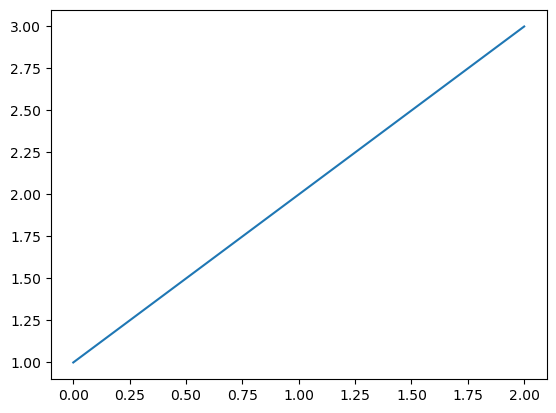

In [1]:
import matplotlib.pyplot as plt

plt.plot([1,2,3])

In [21]:
import torch

#t = torch.load(r'src/model/ckpts/final_embeddings/cifar10_fp16.pt')
#print(t['embeddings'].shape)
# emb_lst = t['embeddings']
t = torch.load(r'src/model/ckpts/soft_targets/cifar10_fp16.pt')
print(t['logits'].shape)
t['logits'][0]

emb_lst = t['logits']

torch.Size([50000, 10])


C:\Users\gauoo\AppData\Local\Temp\ipykernel_25168\1727894448.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(r'src/model/ckpts/soft_targets/cifar10_fp16.p

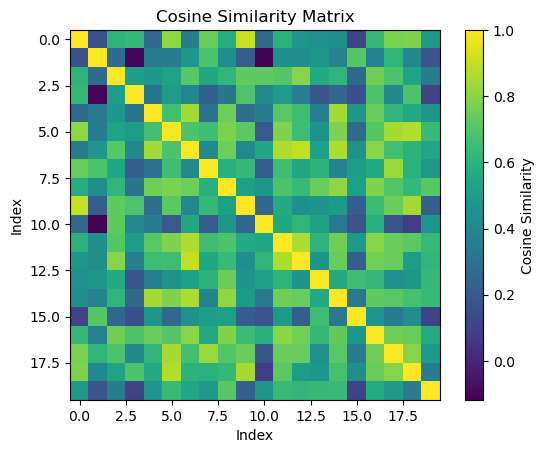

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 1. 코사인 유사도 행렬 계산
cos_sim_matrix = cosine_similarity(emb_lst[:20]) 

# 3. 시각화 (heatmap)
plt.imshow(cos_sim_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Cosine Similarity")
plt.title("Cosine Similarity Matrix")
plt.xlabel("Index")
plt.ylabel("Index")
plt.show()


In [30]:
a = cos_sim_matrix - np.eye(cos_sim_matrix.shape[0], cos_sim_matrix.shape[1])
print(np.max(a, axis=0))
print(np.min(cos_sim_matrix, axis=0))



[0.90104596 0.70343487 0.79828669 0.69143154 0.84851713 0.87111986
 0.89569746 0.8301563  0.81265745 0.90104596 0.72354306 0.86866639
 0.89569746 0.74974854 0.86154421 0.70343487 0.80239283 0.85160582
 0.87111986 0.71154676]
[ 0.10850857 -0.117669    0.25871681 -0.09695066  0.26584023  0.19517823
  0.3500094   0.19919456  0.31705414  0.21380938 -0.117669    0.44426913
  0.21834079  0.18193994  0.24955663  0.10850857  0.37071463  0.17464929
  0.08905615  0.11078472]


C:\Users\gauoo\AppData\Local\Temp\ipykernel_25168\430173557.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


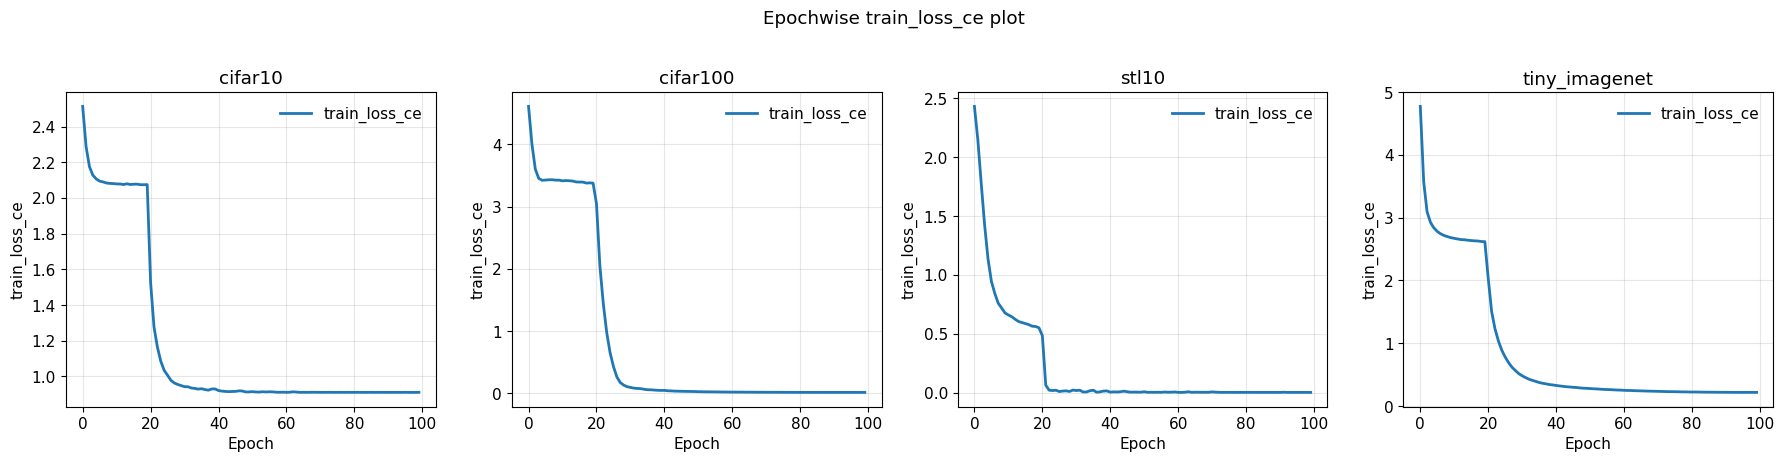

In [28]:
import json
import matplotlib.pyplot as plt

datasets = ['cifar10', 'cifar100', 'stl10', 'tiny_imagenet']
tag = 'train_loss_ce'
# [{"epoch", "time_sec", "train_loss", "train_loss_ce", "train_loss_kd", "train_acc", 
# "val_loss", "val_loss_ce", "val_loss_kd", "val_acc", "lr"]

root_path = r'runs/03_relational_kd/'
lst = []

for dataset in datasets:
    path = root_path + dataset + r'/metrics_per_epoch.jsonl'
    element = []
    with open(path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            element.append(record[tag])
    lst.append(element)

# 보기 좋은 스타일 몇 가지 설정
plt.rcParams.update({
    "font.size": 11,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 2.0,
    "legend.frameon": False
})

fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=False, constrained_layout=True)
epochs = list(range(len(lst[0])))
for ax, element, name in zip(axes, lst, datasets):
    ax.plot(epochs, element, label=tag)
    # 축/제목/범례
    ax.set_title(name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(tag)
    ax.legend(loc="best")

fig.suptitle(f"Epochwise {tag} plot", y=1.02)
plt.tight_layout()
plt.show()

C:\Users\gauoo\AppData\Local\Temp\ipykernel_25168\1541554864.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


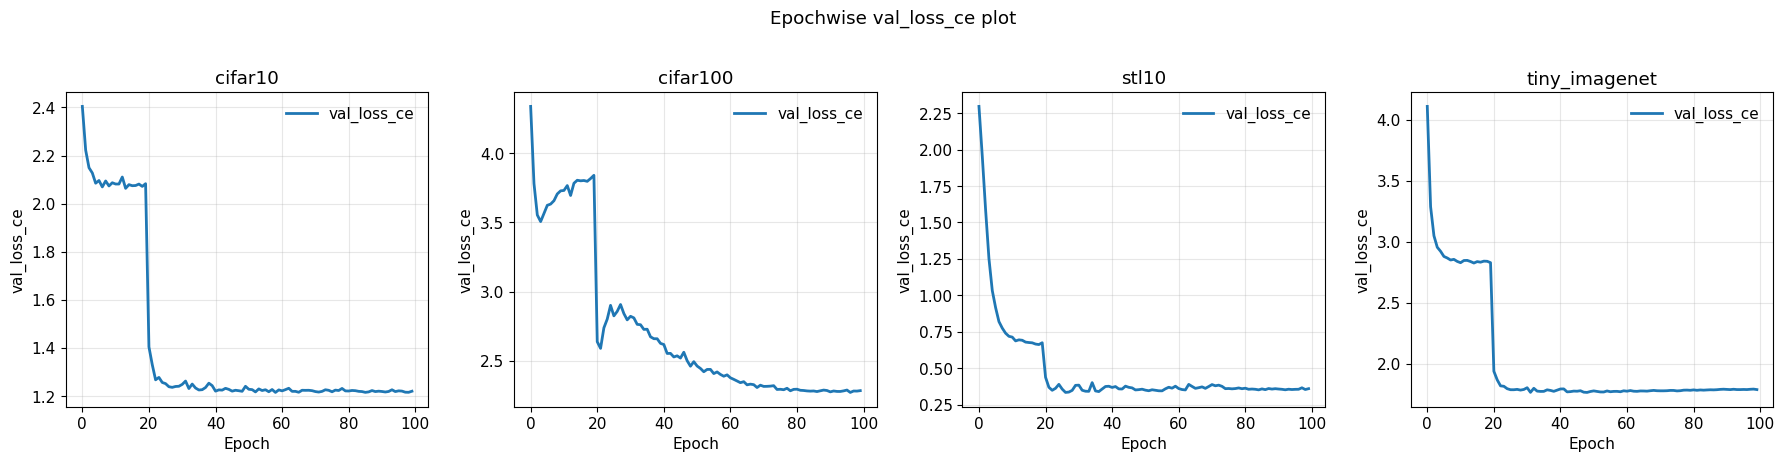

In [29]:
import json
import matplotlib.pyplot as plt

datasets = ['cifar10', 'cifar100', 'stl10', 'tiny_imagenet']
tag = 'val_loss_ce'
# [{"epoch", "time_sec", "train_loss", "train_loss_ce", "train_loss_kd", "train_acc", 
# "val_loss", "val_loss_ce", "val_loss_kd", "val_acc", "lr"]

root_path = r'runs/03_relational_kd/'
lst = []

for dataset in datasets:
    path = root_path + dataset + r'/metrics_per_epoch.jsonl'
    element = []
    with open(path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            element.append(record[tag])
    lst.append(element)

# 보기 좋은 스타일 몇 가지 설정
plt.rcParams.update({
    "font.size": 11,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 2.0,
    "legend.frameon": False
})

fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=False, constrained_layout=True)
epochs = list(range(len(lst[0])))
for ax, element, name in zip(axes, lst, datasets):
    ax.plot(epochs, element, label=tag)
    # 축/제목/범례
    ax.set_title(name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(tag)
    ax.legend(loc="best")

fig.suptitle(f"Epochwise {tag} plot", y=1.02)
plt.tight_layout()
plt.show()